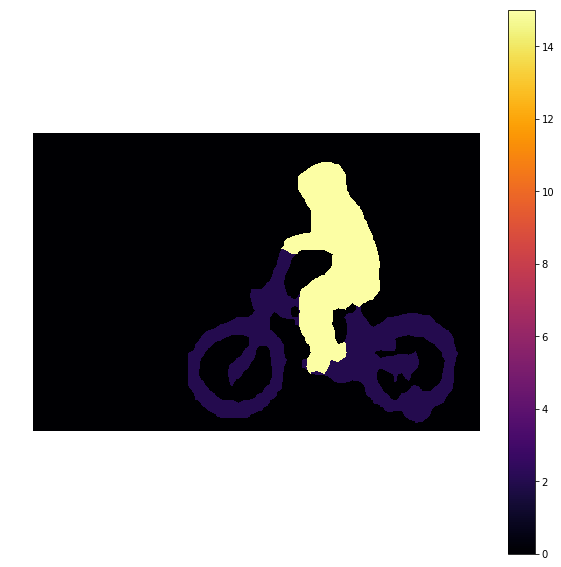

In [3]:
from matplotlib import pyplot as pylab
import cv2
import numpy as np
import os

from model import Deeplabv3

deeplab_model = Deeplabv3()

# input directory
pathIn = "imgs"

# output directory
pathOut = "output"

# define params
trained_img_width = 512.
mean_subtraction_value = 127.5

# if the output directory does not exist, create it
if not os.path.exists(pathOut):
    os.makedirs(pathOut)
    
img = pylab.imread(pathIn + "/image1.jpg")

# grab shape of the input image
w, h, _ = img.shape

# resize the input image
ratio = trained_img_width / np.max([w, h])
resized = cv2.resize(img, (int(ratio*h), int(ratio*w)))

# normalize the resized image
resized = resized / mean_subtraction_value - 1.

# pad array to square image to match training imgs
pad_x = int(trained_img_width - resized.shape[0])
resized2 = np.pad(resized, ((0, pad_x), (0, 0), (0, 0)), mode='constant')

# make prediction
res = deeplab_model.predict(np.expand_dims(resized2, 0))
labels = np.argmax(res.squeeze(), -1)

# plot sample images
pylab.figure(figsize=(10,10))
pylab.imshow(labels[:-pad_x], cmap='inferno')
pylab.axis('off')
pylab.colorbar()
pylab.show()
pylab.savefig("segmented.jpg", bbox_inches='tight', pad_inches=0)
pylab.close()